**Stock Market Visualizer**

- Get sample stock data (from Yahoo Finance CSV).
- Use Pandas to compute moving averages (7-day, 30-day).
- Use NumPy for percent change, daily returns, cumulative returns.
- Plot: closing price + moving averages, histogram of daily returns.


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_excel("../data/yahoo_finance_data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [64]:
df['MA7'] = df['Adj Close**'].rolling(7).mean() 
df['MA30'] = df['Adj Close**'].rolling(30).mean() 

In [65]:
df.head(14)

,Date,Open,High,Low,Close*,Adj Close**,Volume,MA7,MA30
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000,NaN,NaN
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000,NaN,NaN
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000,NaN,NaN
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000,NaN,NaN
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000,NaN,NaN
5,"Apr 21, 2023",33793.60,33858.83,33688.57,33808.96,33808.96,291080000,NaN,NaN
6,"Apr 20, 2023",33740.60,33875.39,33677.74,33786.62,33786.62,307910000,33746.857143,NaN
7,"Apr 19, 2023",33889.83,33957.98,33814.65,33897.01,33897.01,251490000,33718.121429,NaN
8,"Apr 18, 2023",33965.16,34018.62,33791.89,33976.63,33976.63,253570000,33739.617143,NaN
9,"Apr 17, 2023",33930.46,33991.23,33796.91,33987.18,33987.18,234530000,33837.518571,NaN


In [66]:
adj_close = np.array(df['Adj Close**'])
daily_returns =   (adj_close[1:] - adj_close[:-1]) / adj_close[:-1] 
percent_changes = daily_returns*100
cumulative_returns = np.cumprod(1 + daily_returns) - 1 

In [67]:
df['daily_return'] = df['Adj Close**'].pct_change()
df['percent_change'] = df['daily_return'] * 100
df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1

df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,MA7,MA30,daily_return,percent_change,cumulative_return
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000,NaN,NaN,NaN,NaN,NaN
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000,NaN,NaN,-0.007977,-0.797697,-0.007977
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000,NaN,NaN,-0.015500,-1.549954,-0.023353
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000,NaN,NaN,0.006875,0.687529,-0.016638
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000,NaN,NaN,0.010276,1.027621,-0.006533


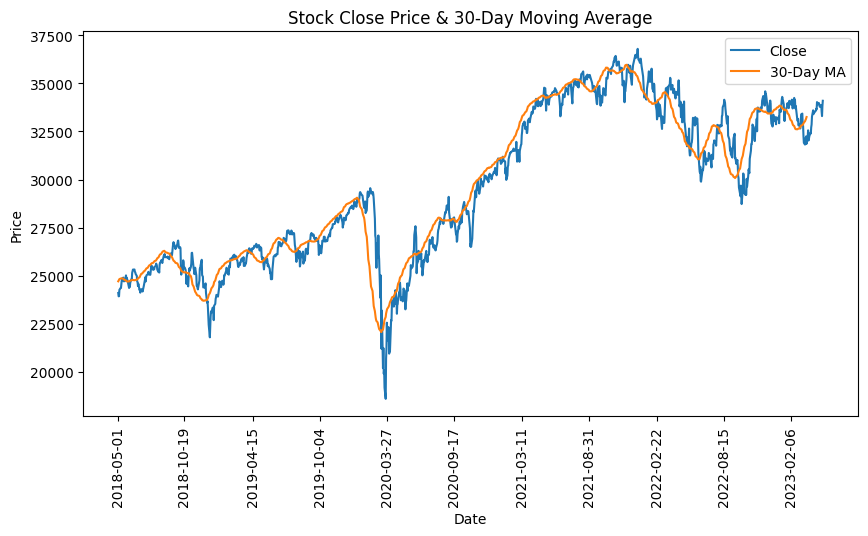

In [68]:
def normalize_date(x):
    x["Date"] = pd.to_datetime(x['Date'])
    return x
plt.figure(figsize=(10,5))


sorted = df.apply(normalize_date,axis=1).sort_values(by="Date",ascending=True).reset_index()
plt.plot(sorted['Date'], sorted['Adj Close**'], label='Close')
plt.plot(sorted['Date'], sorted['MA30'], label='30-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Close Price & 30-Day Moving Average')
plt.xticks(sorted['Date'][::120],rotation=90)
plt.legend()
plt.show()


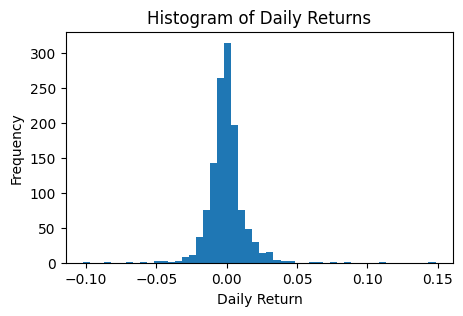

In [69]:
plt.figure(figsize=(5,3))
plt.hist(df['daily_return'].dropna(), bins=50)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Histogram of Daily Returns")
plt.show()
